Шишка Антон (30 Варіант)

In [12]:
!pip install scikit-surprise

from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp, NMF, KNNBasic, BaselineOnly
from surprise import Dataset

Використати датасет   movielens-100k  

In [19]:
data = Dataset.load_builtin(name='ml-100k', prompt=False)
algo = SVD()

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9295  0.9458  0.9361  0.9326  0.9343  0.9356  0.0055  
MAE (testset)     0.7325  0.7444  0.7387  0.7381  0.7340  0.7375  0.0042  
Fit time          1.45    1.64    2.59    1.55    1.74    1.79    0.41    
Test time         0.32    0.27    0.43    0.13    0.33    0.30    0.10    


{'test_rmse': array([0.92948988, 0.94575908, 0.93609931, 0.93259389, 0.93426657]),
 'test_mae': array([0.73246647, 0.74441284, 0.7387346 , 0.73814065, 0.73396025]),
 'fit_time': (1.4522793292999268,
  1.6417841911315918,
  2.5898966789245605,
  1.5468695163726807,
  1.736769437789917),
 'test_time': (0.31849145889282227,
  0.2731659412384033,
  0.43045902252197266,
  0.13356995582580566,
  0.33075594902038574)}

Для кращого розуміння роздрукуйте датасет

In [20]:
for index, (user, item, rating, timestamp) in enumerate(data.raw_ratings[:5]):
    print(f"User: {user}, Item: {item}, Rating: {rating}, Timestamp: {timestamp}")

User: 196, Item: 242, Rating: 3.0, Timestamp: 881250949
User: 186, Item: 302, Rating: 3.0, Timestamp: 891717742
User: 22, Item: 377, Rating: 1.0, Timestamp: 878887116
User: 244, Item: 51, Rating: 2.0, Timestamp: 880606923
User: 166, Item: 346, Rating: 1.0, Timestamp: 886397596


Використайте алгоритми SVD, SVDpp, NMF  + ще два на власний вибір (KNNBasic, BaselineOnly).

In [29]:
# algorithms = [SVD(), SVDpp(), NMF(), KNNBasic(), BaselineOnly()]

# for algo in algorithms:
#     results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)
#     print(f"Algorithm: {algo}, Mean RMSE: {results['test_rmse'].mean()}")

svd = SVD()
svdpp = SVDpp()
nmf = NMF()
knn = KNNBasic()
baseline = BaselineOnly()

svd_results = cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)
print(f"Algorithm: {svd}, Mean RMSE: {results['test_rmse'].mean()}")

svdpp_results = cross_validate(svdpp, data, measures=['RMSE'], cv=5, verbose=True)
print(f"Algorithm: {svdpp}, Mean RMSE: {results['test_rmse'].mean()}")

nmf_results = cross_validate(nmf, data, measures=['RMSE'], cv=5, verbose=True)
print(f"Algorithm: {nmf}, Mean RMSE: {results['test_rmse'].mean()}")

knn_results = cross_validate(knn, data, measures=['RMSE'], cv=5, verbose=True)
print(f"Algorithm: {knn}, Mean RMSE: {results['test_rmse'].mean()}")

baseline_results = cross_validate(baseline, data, measures=['RMSE'], cv=5, verbose=True)
print(f"Algorithm: {baseline}, Mean RMSE: {results['test_rmse'].mean()}")

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9335  0.9451  0.9423  0.9338  0.9339  0.9377  0.0050  
Fit time          2.57    1.71    1.80    1.72    1.73    1.91    0.33    
Test time         0.15    0.35    0.25    0.24    0.15    0.23    0.08    
Algorithm: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7e0badfd0d30>, Mean RMSE: 0.9438421663791556
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9164  0.9219  0.9196  0.9246  0.9156  0.9196  0.0034  
Fit time          28.18   28.92   28.14   28.03   28.09   28.27   0.33    
Test time         6.19    4.67    5.96    4.80    4.77    5.28    0.66    
Algorithm: <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7e0badfd36a0>, Mean RMSE: 0.9438421663791556
Evaluating RMSE of algorithm NMF on 5 split(s).


Виберіть оптимальний алгоритм

In [31]:
svd_rmse_mean = svd_results['test_rmse'].mean()
svdpp_rmse_mean = svdpp_results['test_rmse'].mean()
nmf_rmse_mean = nmf_results['test_rmse'].mean()
knn_rmse_mean = knn_results['test_rmse'].mean()
baseline_rmse_mean = baseline_results['test_rmse'].mean()

print("SVD RMSE Mean:", svd_rmse_mean)
print("SVD++ RMSE Mean:", svdpp_rmse_mean)
print("NMF RMSE Mean:", nmf_rmse_mean)
print("KNN RMSE Mean:", knn_rmse_mean)
print("BaselineOnly RMSE Mean:", baseline_rmse_mean)

SVD RMSE Mean: 0.937727199119968
SVD++ RMSE Mean: 0.919639649208041
NMF RMSE Mean: 0.9636130369327471
KNN RMSE Mean: 0.9792397625223904
BaselineOnly RMSE Mean: 0.9441180649984304


Зробіть візуалізацію.

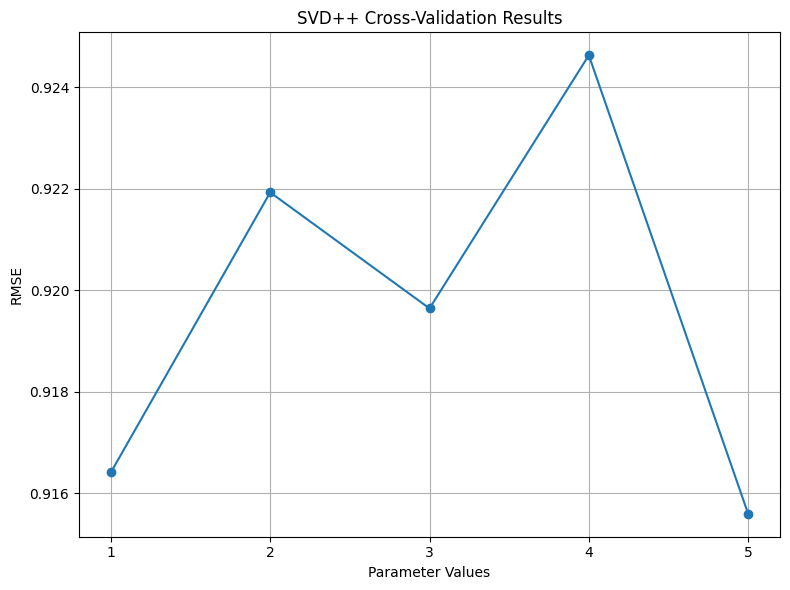

In [32]:
import matplotlib.pyplot as plt


param_values = [1, 2, 3, 4, 5]

rmse_values = svdpp_results['test_rmse']

plt.figure(figsize=(8, 6))
plt.plot(param_values, rmse_values, marker='o', linestyle='-')
plt.title('SVD++ Cross-Validation Results')
plt.xlabel('Parameter Values')
plt.ylabel('RMSE')
plt.grid(True)
plt.xticks(param_values)
plt.tight_layout()

plt.show()

**Висновок**


Зважаючи на результати крос-валідації з використанням даних із surprise бібліотеки для рекомендаційних систем, найкращим алгоритмом серед розглянутих виявився SVD++. Його висока точність передбачення рейтингів фільмів для користувачів на основі даних з набору movielens-100k свідчить про його ефективність у рекомендаційних системах порівняно з іншими алгоритмами, що були розглянуті.